### How do I calculate the accuracy of my regression model?

We cannot calculate accuracy for a regression model. Accuracy (e.g. classification accuracy) is a measure for classification, not regression. The skill or performance of a regression model must be reported as an error in those predictions.

This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

 - Mean Squared Error (MSE).
 - Root Mean Squared Error (RMSE).
 - Mean Absolute Error (MAE).

There are many other metrics for regression, although these are the most commonly used. You can see the full list of regression metrics supported by the scikit-learn Python machine learning library here:

 - Scikit-Learn API: Regression Metrics. => https://scikit-learn.org/stable/modules/classes.html#regression-metrics

### 1. MEAN SQUARED ERROR (MSE):
The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

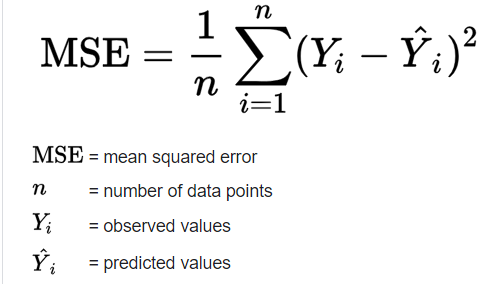

The difference between observed and predicted values is squared, which has the effect of removing the sign, resulting in a positive error value.

The squaring also has the effect of inflating or magnifying large errors. That is, the larger the difference between the predicted and expected values, the larger the resulting squared positive error. This has the effect of “punishing” models more for larger errors when MSE is used as a loss function. It also has the effect of “punishing” models by inflating the average error score when used as a metric.

Let's look at an example to understand it better.

In [39]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

error = []

for i in range(len(predicted)):
    difference = (predicted[i] - expected[i])**2
    error.append(difference)

In [41]:
error

[0.0,
 0.009999999999999995,
 0.03999999999999998,
 0.09000000000000002,
 0.16000000000000003,
 0.25,
 0.36,
 0.48999999999999994,
 0.6400000000000001,
 0.81,
 1.0]

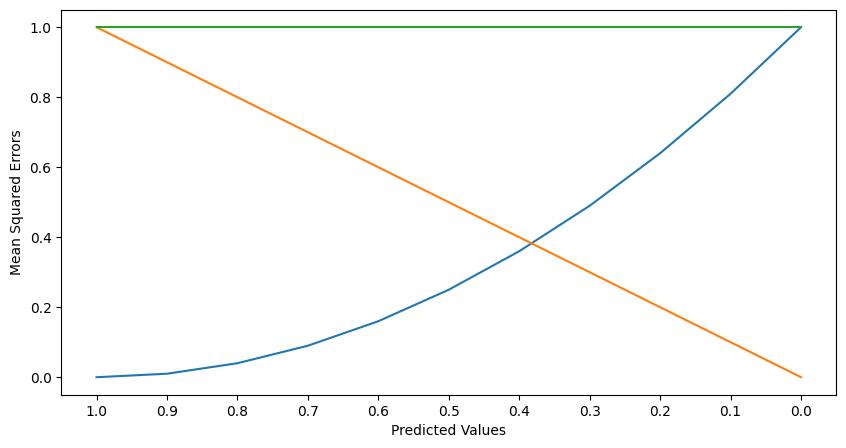

In [42]:
plt.figure(figsize=(10,5))
plt.plot(error)
plt.plot(predicted)
plt.plot(expected)
plt.xticks(ticks=[i for i in range(len(error))], labels=predicted)
plt.xlabel("Predicted Values")
plt.ylabel("Mean Squared Errors")
plt.show()

The mean squared error between your expected and predicted values can be calculated using the mean_squared_error() function from the scikit-learn library. A perfect mean squared error value is 0.0, which means that all predictions matched the expected values exactly.

This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.

A good MSE is relative to your specific dataset.

It is a good idea to first establish a baseline MSE for your dataset using a naive predictive model, such as predicting the mean target value from the training dataset. A model that achieves an MSE better than the MSE for the naive model has skill.

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse = mean_squared_error(expected,predicted)
mse

0.35000000000000003

### ROOT MEAN SQUARED ERROR (RMSE):
The RMSE is the square root of MSE.

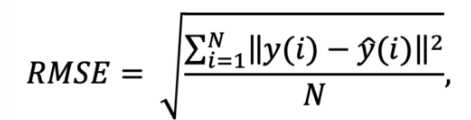

where N is the number of data points, y(i) is the i-th measurement, and y ̂(i) is its corresponding prediction.

Note that the RMSE cannot be calculated as the average of the square root of the mean squared error values. This is a common error made by beginners and is an example of Jensen’s inequality.

A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly.

This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.

A good RMSE is relative to your specific dataset.

It is a good idea to first establish a baseline RMSE for your dataset using a naive predictive model, such as predicting the mean target value from the training dataset. A model that achieves an RMSE better than the RMSE for the naive model has skill.

Let's look at the example from above.

In [45]:
np.sqrt(mse)

0.5916079783099616

The root mean squared error between your expected and predicted values can be calculated using the mean_squared_error() function from the scikit-learn library.

By default, the function calculates the MSE, but we can configure it to calculate the square root of the MSE by setting the “squared” argument to False.

In [46]:
rmse = mean_squared_error(expected,predicted, squared=False)
rmse

0.5916079783099616

### MEAN ABSOLUTE ERROR (MAE):
Mean Absolute Error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

That is, MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

As its name suggests, the MAE score is calculated as the average of the absolute error values. Absolute or abs() is a mathematical function that simply makes a number positive. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE.

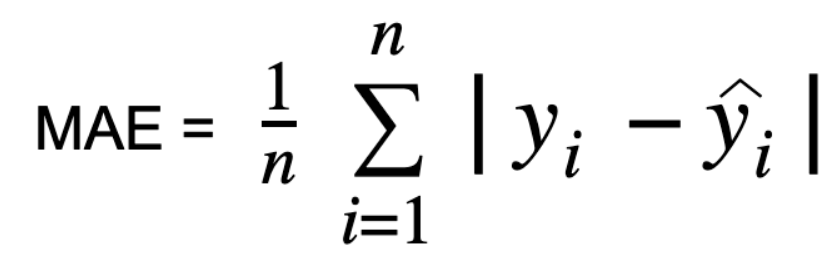

where, y<sub>i</sub> is observed value, y&#770;<sub>i</sub> is the predicted value and N is the number of data points

Let's look at above example.

In [47]:
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

error = []

for i in range(len(predicted)):
    difference = abs(predicted[i] - expected[i])
    error.append(difference)

In [48]:
error

[0.0,
 0.09999999999999998,
 0.19999999999999996,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0]

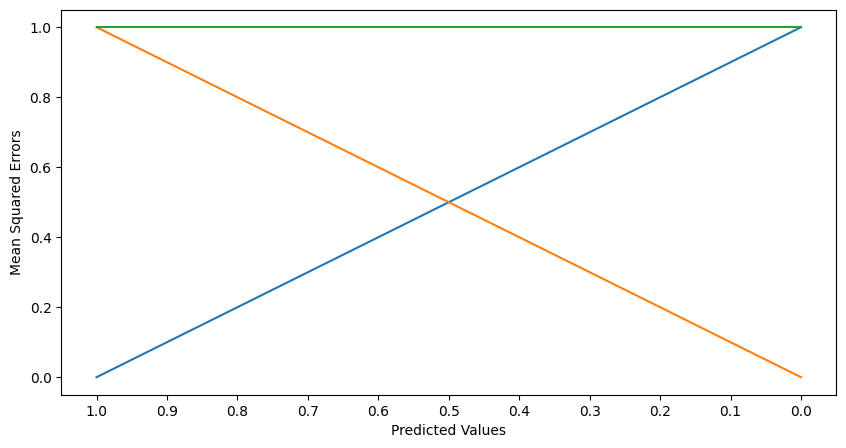

In [52]:
plt.figure(figsize=(10,5))
plt.plot(error)
plt.plot(predicted)
plt.plot(expected)
plt.xticks(ticks=[i for i in range(len(error))], labels=predicted)
plt.xlabel("Predicted Values")
plt.ylabel("Mean Squared Errors")
plt.show()

The mean absolute error between your expected and predicted values can be calculated using the mean_absolute_error() function from the scikit-learn library.

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expected,predicted)

0.5

A perfect mean absolute error value is 0.0, which means that all predictions matched the expected values exactly.

This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.

A good MAE is relative to your specific dataset.

It is a good idea to first establish a baseline MAE for your dataset using a naive predictive model, such as predicting the mean target value from the training dataset. A model that achieves a MAE better than the MAE for the naive model has skill.